In [1]:
import math

# Function that runs the simulation
# I - an array of input current values of length the number of time steps to be simulated
# tau: time constant (in ms)
# threshold: threshold value to produce a spike
# reset: reset value after a spike
# dt: simulation time step in ms
def LIF(I, tau=10, threshold=1.0, reset=0.0, dt=0.1):
    num_steps = len(I)
    
    # V_rec an array that will store the recorded membrane potential values, with length the number of time steps to be simulated
    V_rec = np.zeros(num_steps)
    spikes = [] # list to store spike times
    t = 0

    for index, value in enumerate(I):
      if index == 0:
        C = -I[0]
      elif I[index] != I[index-1]:
        C = V_rec[index-1] - value

      # solve the differential equation to compute the value  𝑉(𝑡+d𝑡) in terms of 𝑉(𝑡), 𝜏, and 𝐼(𝑡) .
      V_rec[index] = C * np.exp(-(dt / tau)) + value

      # fire or not
      if (V_rec[index] > threshold):
        spikes.append(t)
        V_rec[index] = reset
        C = -I[0]

      t += dt


    return V_rec, np.array(spikes)

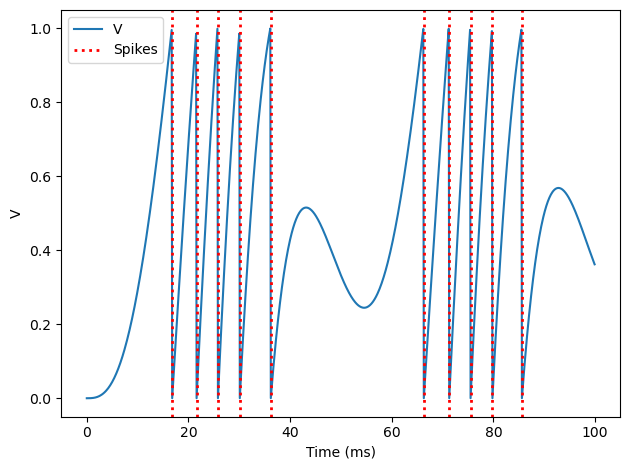

In [6]:
# Test implementation
import numpy as np
import matplotlib.pyplot as plt

dt = 0.1
T = np.arange(1000)*dt*1e-3
V_rec, spikes = LIF(3*np.sin(2*np.pi*10*T)**2, tau=10, dt=dt)
plt.plot(np.arange(len(V_rec))*dt, V_rec, label='V')
for i, t in enumerate(spikes):
    plt.axvline(t, ls=':', c='r', lw=2, label='Spikes' if i==0 else None)
plt.xlabel('Time (ms)')
plt.ylabel('V')
plt.legend(loc='best')
plt.tight_layout()